In [5]:
####################################
### IMport stuff
####################################
import numpy as np
import matplotlib.pyplot as plt

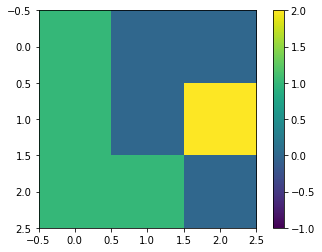

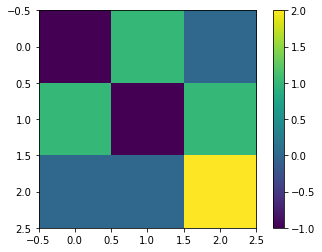

In [33]:
####################################
### Set parameters
####################################
L = 3 #size of lattice (nice to keep small when debugging, then crank up later)
max_time = 10 #number of updates (nice to keep small when debugging, then crank up later)

#probabilities of actions
p_move = 0.4
p_compete = .5
#(make sure these sum to < 1)
p_reproduce = 1 - p_move - p_compete


####################################
### Set up needed arrays
####################################

#possible things to happen at each time step
actions = ['move', 'compete', 'reproduce']
#the probabilites at which they will happen
action_probs = [p_move, p_compete, p_reproduce]

#defining neighbourhoods
#neighbor_list = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,1],[1,-1],[1,0],[1,1]])
neighbor_list = np.array([[-1,0],[0,-1],[0,1],[1,0]])
num_of_neighbors = len(neighbor_list[:,0])

#this is the pay-off matrix for P-R-S
pay_outs = np.array([[0,1,-1],[-1,0,1],[1,-1,0]])

#this is the 'world' in which the agents are playing
strategies = np.random.randint(0,3,(L,L))
#print(strategies)
# 0 = paper
# 1 = rock
# 2 = scissors
# -1 = empty


####################################
### Run simulation
####################################
for t in range(max_time):

#     print('This is update number: ' + str(t))
#     print('The system looks like this')
    #plot the system
    if t % (L*L) == 0: #you can use this to plot it less frequently once you have it running
        plt.figure()
        plt.imshow(strategies,vmin = -1,vmax = 2)
        plt.colorbar()
        plt.show()

    # pick focal
    focal_i = np.random.randint(0,L)
    focal_j = np.random.randint(0,L)
#     print('The focal individual is at ' + str(focal_i) + ',' +str(focal_j))
#     print('The focal strategy is ' + str(strategies[focal_i,focal_j]))
    
    # pick random neighbour
    neighbor_num = np.random.randint(0,num_of_neighbors)
    neighbor_i = (focal_i + neighbor_list[neighbor_num,0] ) % L
    neighbor_j = (focal_j + neighbor_list[neighbor_num,1] ) % L
#     print('The neighbor individual is at ' + str(neighbor_i) + ',' +str(neighbor_j))
#     print('The neighbor strategy is ' + str(strategies[neighbor_i,neighbor_j]))
    
    # pick action
    action_2_do = np.random.choice(actions,p=action_probs)
#     print('Weve choose to do ' + action_2_do)
    
    # if action = move
    if action_2_do == 'move':
        ###swap places
        temp = strategies[focal_i,focal_j] 
        strategies[focal_i,focal_j] = strategies[neighbor_i,neighbor_j]
        strategies[neighbor_i,neighbor_j] = temp
        #save the focal strat temporarily
        # replace focal with neighbor
        # replace neighbor with SAVED focal
            
    #otherwise, if action = compete
    elif action_2_do == 'compete':
        ###compete and remove loser
        #find focal strategy
        focal_strategy = strategies[focal_i,focal_j]
        #find neighbor strategy
        neighbor_strategy = strategies[neighbor_i,neighbor_j]
        #if both are alive
        if (focal_strategy > -1 & neighbor_strategy >-1):
            
            #get the payout to the focal individual (use predifined pay_outs array)
            focal_payout = pay_outs[focal_strategy,neighbor_strategy]
            if focal_payout == 1:#if focal payout ==1, then focal won
                strategies[neighbor_i,neighbor_j] = -1 #remove neighbor (make their strategy -1)
            elif focal_payout == -1: #otherwise, if focal payout = -1, then focal lost
                strategies[focal_i,focal_j] = -1 #remove focal (make thier strategy -1)

    #if action = reproduce
    elif action_2_do == 'reproduce':
        ### reproduce
        #find focal strategy
        focal_strategy = strategies[focal_i,focal_j]
        #find neighbor strategy
        neighbor_strategy = strategies[neighbor_i,neighbor_j]
        
        if focal_strategy ==-1 & neighbor_strategy > -1: #if focal site is empty, and neighbor not
            strategies[focal_i,focal_j] = neighbor_strategy#copy neighbor strategy to focal site
        elif focal_strategy >-1  & neighbor_strategy == -1: #otherwise, if focal not empty and neighbor is emtpy
            strategies[neighbor_i,neighbor_j] = focal_strategy#copy focal strategy to neighbor site


In [32]:
neighbor_num = np.random.randint(0,num_of_neighbors)
print(neighbor_num)
neighbor_i = (focal_i + neighbor_list[neighbor_num,0] ) % L
neighbor_j = (focal_j + neighbor_list[neighbor_num,1] ) % L
print(focal_i,focal_j)
print(neighbor_i,neighbor_j)

1
1 0
1 2
